In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/Alisha/Desktop/Files/ts.csv",header=None)


In [2]:
A.columns = ["Month","No_Passengers"]
A.head()

,Month,No_Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
A.index = pd.to_datetime(A.Month,format="%Y-%m")
A = A.drop(labels=["Month"],axis=1)
A.head()

,No_Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 1.0, 'Passengers travelled through airlines from 1949-1960')

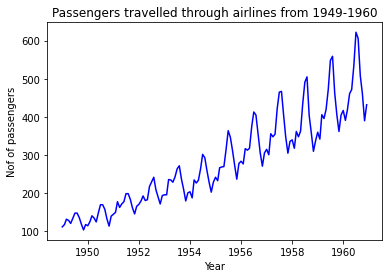

In [4]:
from matplotlib.pyplot import plot,xlabel,ylabel,title
plot(A,c="blue")
xlabel("Year")
ylabel("Nof of passengers")
title("Passengers travelled through airlines from 1949-1960")

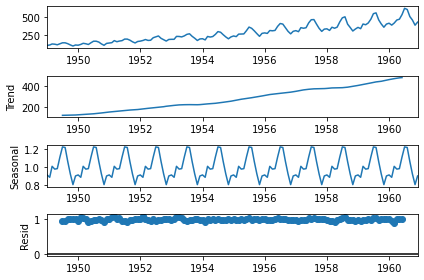

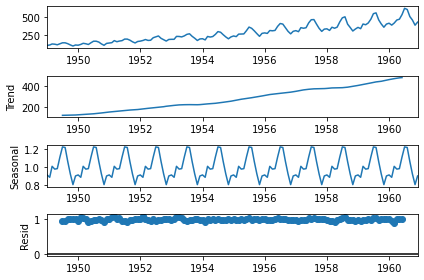

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
B = seasonal_decompose(A,"multiplicative")
B.plot()

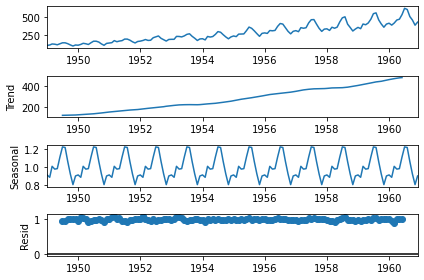

<Figure size 3600x3600 with 0 Axes>

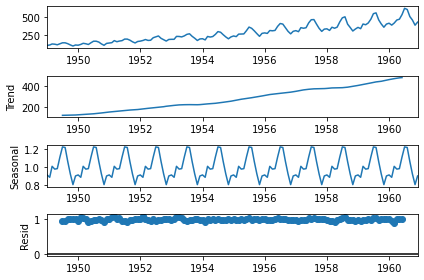

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
B.plot()

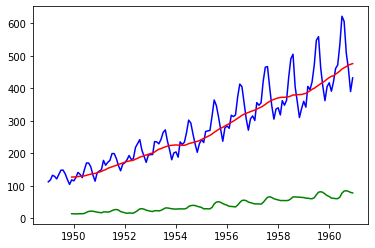

In [7]:
plot(A,c="blue")
plot(A.rolling(window=12).mean(),c="red")
plot(A.rolling(window=12).std(),c="green")

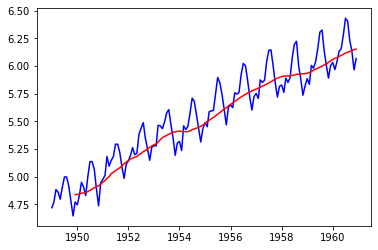

In [8]:
from numpy import log
B = log(A)
plot(B,c="blue")
plot(B.rolling(window=12).mean(),c="red")

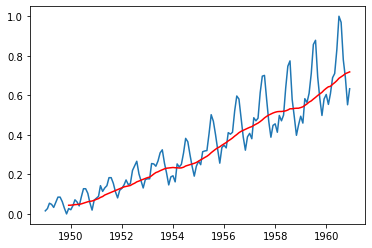

In [9]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mm = MinMaxScaler()
C = pd.DataFrame(mm.fit_transform(A),index=A.index,columns=["Pass"])
plot(C)
plot(C.rolling(window=12).mean(),c="red")

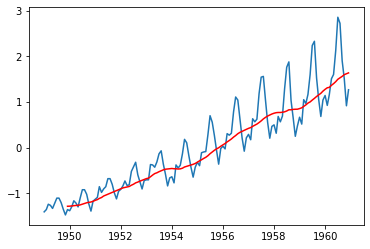

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss = StandardScaler()
D = pd.DataFrame(ss.fit_transform(A),index=A.index,columns=["Pass"])
plot(D)
plot(D.rolling(window=12).mean(),c="red")

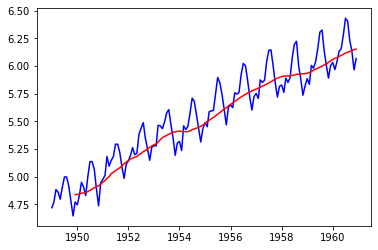

In [11]:
B = log(A)
plot(B,c="blue")
plot(B.rolling(window=12).mean(),c="red")

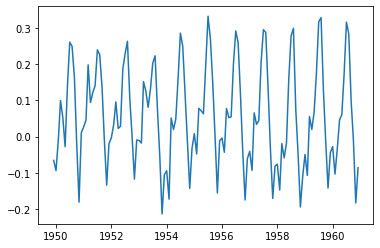

In [12]:
C = B.rolling(window=12).mean()
D = B - C
plot(D)

In [13]:
E = D[D.No_Passengers.isnull() == False]
from statsmodels.tsa.stattools import adfuller
adfuller(E)[1]

0.02223463000124245

In [14]:
adfuller(A)[1]

0.9918802434376409

In [15]:
from numpy import round
sizets=int(round(E.count()*0.2))
sizetr=int(round(E.count()*0.8))
trd = E[0:sizetr]
tsd = E[sizetr:E.shape[0]]
tsd.tail()

,No_Passengers
Month,
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230
1960-11-01,-0.182690
1960-12-01,-0.085789


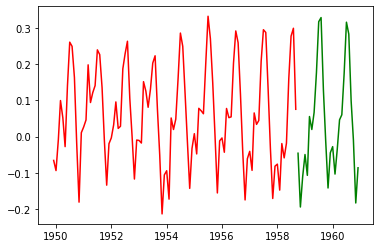

In [16]:
plot(trd,c="red")
plot(tsd,c="green")

In [ ]:
from statsmodels.tsa.AutoReg import AR
model = AR(trd).fit()
pred = model.predict(start="1958-08-01",end="1960-12-01")

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(trd,order=[5,1,1]).fit()
pred = model.predict(start="1958-08-01",end="1960-12-01")
plot(trd)
plot(pred)
plot(tsd)

In [ ]:
plot(trd)
plot(pred)
plot(tsd)

In [ ]:
pred